# More on Functions

In this set of notes, we'll discuss some further topics in the design of functions. 

## Getting Functions: Modules

Python comes with a large variety of powerful functions, which can be assembled to create flexible programs. Sometimes, you might want a function that isn't available from the "core" Python installation. In this case, you can import **modules.** 

A module is simply one or more text files, often ending with extension `.py`, which define some functions. Your distribution of Anaconda already gives you access to many important modules. 

The simplest way to import a module is to write `import` followed by the name of the module. 

In [1]:
import numpy # numerical utilities

We can now use all of the functions defined in the `numpy` module by prepending `numpy.` to the function we want. For example: 

In [2]:
A = numpy.random.rand(5, 5) # 10x10 matrix of random numbers between 0 and 1
A

array([[0.28968501, 0.38157963, 0.53933666, 0.86037725, 0.26938766],
       [0.4589406 , 0.8804877 , 0.98705022, 0.45899723, 0.2062872 ],
       [0.86116822, 0.96530766, 0.80227199, 0.08761291, 0.35348963],
       [0.48922047, 0.70656401, 0.58946979, 0.81395906, 0.83316483],
       [0.22578697, 0.60152439, 0.14795253, 0.64127161, 0.2312698 ]])

Sometimes, the module we want is actually supplied *inside* another module. A very common example comes from `matplotlib`, a library for data visualization that we will use extensively later in this course. Most of the time, we only need the `pyplot` module, which is housed within `matplotlib`. To import it, we use `from`: 

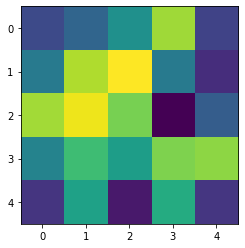

In [3]:
from matplotlib import pyplot
pyplot.imshow(A)

You can also give a module an *alias* which allows you to refer to it using a shorter name, using `as`:

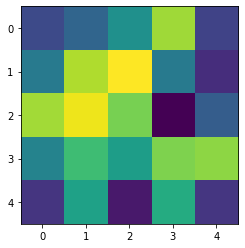

In [4]:
from matplotlib import pyplot as plt
plt.imshow(A)

## Learning About Functions

Often we know roughly what we would like to do, but not exactly which function we should use or how to use it. 
If you would like to learn more about a function, there are three main things you should try: 

1. If you know roughly what a function does, but can't remember the details, check the **documentation.**
2. If you have a problem and you're not sure what function should solve it, **ask your group members** or **post in the discussion forum.**
3. If you can't figure it out within your group or on the forum, try **Googling.** StackOverflow is a particularly good resource. 

### Read the Docs

To check the documentation of a function, just write down the function's name and add a `?` in front. Don't include `()` parentheses. 

In [5]:
# wrong
?sorted() 

# right
?sorted   

# within an imported module
?plt.imshow

Object `sorted() ` not found.


## Write the Docs

Most of the Python code you write in this class will be enclosed within functions. All functions you write (and all functions you turn in) are expected to be documented using comments and docstrings. 

Your code should include comments and docstrings. 

**Comments** (marked in Python with a `#`) explain the intention and operation of small lines or blocks of code. 

**Docstrings** give a detailed explanation of the inputs and outputs of a function. Docstrings are typically placed directly below the first line of a function definition. They are placed between three pairs of quotation marks `"""like this"""`. It is not required that you follow a defined format for your docstrings, but each one should make clear (a) the role of all parameters and (b) what the user should expect the function to return. 

For more examples of appropriately documented code, please refer to the notebook [Expectations for Submitted Assignments](https://nbviewer.jupyter.org/github/PhilChodrow/PIC16A/blob/master/content/w0/expectations_for_assignments.ipynb). 

In [6]:
def power_of_k(k, power=1):
    """
    Compute an integer power of a user-specified number k. 
    """
    # initialize
    x = 1
    
    # multiply x by k power times. 
    for i in range(power):
        x *= k
    return x

Once you've documented your functions, you can then check the documentation later: 

In [7]:
?power_of_k

## Writing Modules

We won't ask you to write modules in this class, but you might find it convenient when working on larger projects. To import a module into a notebook, just write `import <filename>`. For example, let's create a simple module by writing some code to a file. 

In [8]:
# file contents

code = '''
def power_of_k(k, power=1):
    """
    Compute an integer power of a user-specified number k. 
    """
    # initialize
    x = 1
    
    # multiply x by k power times. 
    for i in range(power):
        x *= k
    return x
'''

file = open('power.py', 'w')
file.write(code)
file.close()

In [9]:
import power
power.power_of_k(8, power = 2)

64

## No Global Variables

As we discussed last lecture, functions generally can't modify global variables. 

**Question:** What if you *want* your function to modify a global variable? 

**Answer:** Find another way.

With **very** rare exceptions, functions should not modify global variables, as this can lead to code that is difficult to read and troubleshoot. Here's a helpful [StackOverflow answer](https://stackoverflow.com/questions/19158339/why-are-global-variables-evil) on the dangers of abusing global variables. 

Generally speaking, any data that your function requires should be supplied as an argument, rather than taken from the global scope. 

In [10]:
# don't do this

x = 3
def double():
    return(2*x)

# do this instead

def double(x):
    return(2*x)
    
double(3)

6

## Functions with Memory

A common reason we might want to use global variables is to give functions **memory**. For example, suppose we want to simply count the number of times that a function has been called. Here's a first attempt: 

In [11]:
# NEVER DO THIS
x = 0
def counter():
    global x           # forces Python to overwrite global variable x. 
    x = x+1
    return(x)

In [12]:
counter(), counter(), counter()

(1, 2, 3)

The basic problem here is that the `counter()` function will not work correctly if the user has independently modified `x`. 

While there are ways to create functions with memories, this is usually not the best solution to a problem. Instead, it is generally preferable to create a class. We'll discuss objects and classes soon. 